<a href="https://colab.research.google.com/github/HarshESC/Unsupervised-Learning-Capstone-NJ_Transit_-_Amtrak/blob/main/NJ_Transit_%2B_Amtrak_PCA_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RESEARCH QUESTION:  

1. Using PCA and K-means to do the clustering (visualizations and many clusters, justify using silhouette scores)
2. For PCA/K-means (K>= 4), draw the bar graphs to answer the following questions:
    a. Which cluster contains the most train delay on Friday?
    b. Which cluster contains the most train delays for the rush hour in the weekday?
3. Using T-sne and GMM to do the clustering (visualizations and many clusters, justify using silhouette scores)
4. For T-sne/GMM (K>= 4), draw the bar graphs to answer the following questions:
    a. Which cluster contains the most train delay on Friday?
    b. Which cluster contains the most train delays for the rush hour in the weekday?
5. Write up the comparisons analysis and conclusions.


### Let's Look at our Data

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

import warnings
warnings.filterwarnings('ignore')



from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Capstone 3"

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter, defaultdict
from sklearn import metrics


Mounted at /content/gdrive
/content/gdrive/My Drive/Capstone 3


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,dateID,date,DayOfWeekID,DayOfWeek,isnumber,train_id,stop_sequence,from_id,from,to_id,to,rush_hour,scheduled_time,actual_time,is_Delayed_id,is_Delayed,delay_minutes,statusID,status,lineID,line,typeID,type
0,1,5/1/2020,6,Friday,True,5543,1.0,107,Newark Penn Station,107,Newark Penn Station,0,23:38,23:40,1,yes,2.150000,1,departed,1,Raritan Valley,1,NJ Transit
1,1,5/1/2020,6,Friday,True,5543,2.0,107,Newark Penn Station,38105,Union,0,23:47,23:47,1,yes,0.016667,1,departed,1,Raritan Valley,1,NJ Transit
2,1,5/1/2020,6,Friday,True,5543,3.0,38105,Union,31,Roselle Park,0,23:50,23:51,1,yes,1.066667,1,departed,1,Raritan Valley,1,NJ Transit
3,1,5/1/2020,6,Friday,True,5543,4.0,31,Roselle Park,32,Cranford,0,23:55,23:55,1,yes,0.516667,1,departed,1,Raritan Valley,1,NJ Transit
4,1,5/1/2020,6,Friday,True,5543,5.0,32,Cranford,155,Westfield,0,23:59,23:59,1,yes,0.016667,1,departed,1,Raritan Valley,1,NJ Transit


In [ ]:
# Check for nulls
df.isnull().sum()*100/df.isnull().count()


dateID             0.000000
date               0.000000
DayOfWeekID        0.000000
DayOfWeek          0.000000
isnumber           0.000000
train_id           0.000000
stop_sequence     11.678048
from_id            0.000000
from               0.000000
to_id              0.000000
to                 0.000000
rush_hour          0.000000
scheduled_time    11.678048
actual_time        0.000000
is_Delayed_id      0.000000
is_Delayed         0.000000
delay_minutes     11.678048
statusID           0.000000
status             0.000000
lineID             0.000000
line               0.000000
typeID             0.000000
type               0.000000
dtype: float64

In [ ]:
#Drop nulls and see how many observations we have:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87172 entries, 0 to 98697
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dateID          87172 non-null  int64  
 1   date            87172 non-null  object 
 2   DayOfWeekID     87172 non-null  int64  
 3   DayOfWeek       87172 non-null  object 
 4   isnumber        87172 non-null  bool   
 5   train_id        87172 non-null  object 
 6   stop_sequence   87172 non-null  float64
 7   from_id         87172 non-null  int64  
 8   from            87172 non-null  object 
 9   to_id           87172 non-null  int64  
 10  to              87172 non-null  object 
 11  rush_hour       87172 non-null  int64  
 12  scheduled_time  87172 non-null  object 
 13  actual_time     87172 non-null  object 
 14  is_Delayed_id   87172 non-null  int64  
 15  is_Delayed      87172 non-null  object 
 16  delay_minutes   87172 non-null  float64
 17  statusID        87172 non-null 

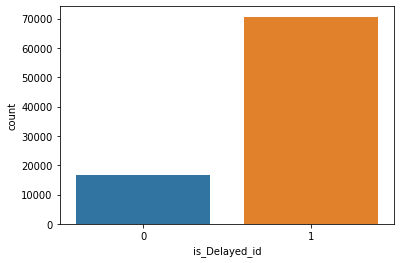

In [ ]:
import seaborn as sns
sns.countplot(df['is_Delayed_id'])


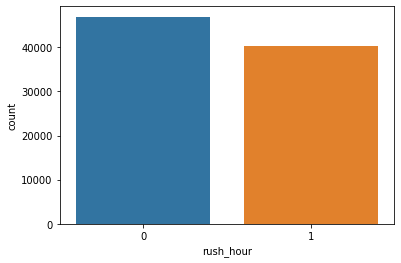

In [ ]:
sns.countplot(df['rush_hour'])


Friday       15511
Monday       15334
Sunday       12997
Saturday     12827
Wednesday    10319
Tuesday      10130
Thursday     10054
Name: DayOfWeek, dtype: int64

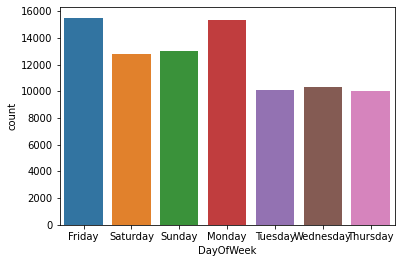

In [ ]:
sns.countplot(df['DayOfWeek'])
df['DayOfWeek'].value_counts()

departed     76862
estimated     7824
cancelled     2486
Name: status, dtype: int64

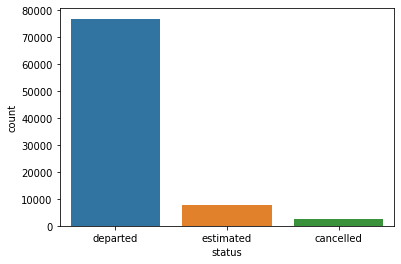

In [ ]:
sns.countplot(df['status'])
df['status'].value_counts()

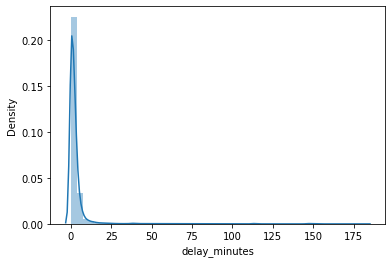

In [ ]:
sns.distplot(df['delay_minutes'])

In [ ]:
df.nunique()

dateID              18
date                18
DayOfWeekID          7
DayOfWeek            7
isnumber             1
train_id           464
stop_sequence       26
from_id            156
from               156
to_id              155
to                 155
rush_hour            2
scheduled_time    1295
actual_time       1368
is_Delayed_id        2
is_Delayed           2
delay_minutes     1754
statusID             3
status               3
lineID              20
line                11
typeID               1
type                 1
dtype: int64

In [ ]:
# Descriptive statistics.
df.describe()

,dateID,DayOfWeekID,stop_sequence,from_id,to_id,rush_hour,is_Delayed_id,delay_minutes,statusID,typeID
count,87172.000000,87172.000000,87172.000000,87172.000000,87172.000000,87172.000000,87172.000000,87172.000000,87172.000000,87172.0
mean,9.462889,3.997339,8.046907,4303.809537,4346.908595,0.462064,0.810054,3.281289,1.061235,1.0
std,5.160223,2.076806,4.984259,11927.826579,11980.281298,0.498562,0.392261,10.253101,0.338413,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5.000000,2.000000,4.000000,48.000000,50.000000,0.000000,1.000000,0.116667,1.000000,1.0
50%,9.000000,4.000000,8.000000,99.000000,102.000000,0.000000,1.000000,1.200000,1.000000,1.0
75%,14.000000,6.000000,11.000000,131.000000,134.000000,1.000000,1.000000,3.083333,1.000000,1.0
max,18.000000,7.000000,26.000000,43599.000000,43599.000000,1.000000,1.000000,182.000000,2.000000,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ce5b9c50>,
      dtype=object)

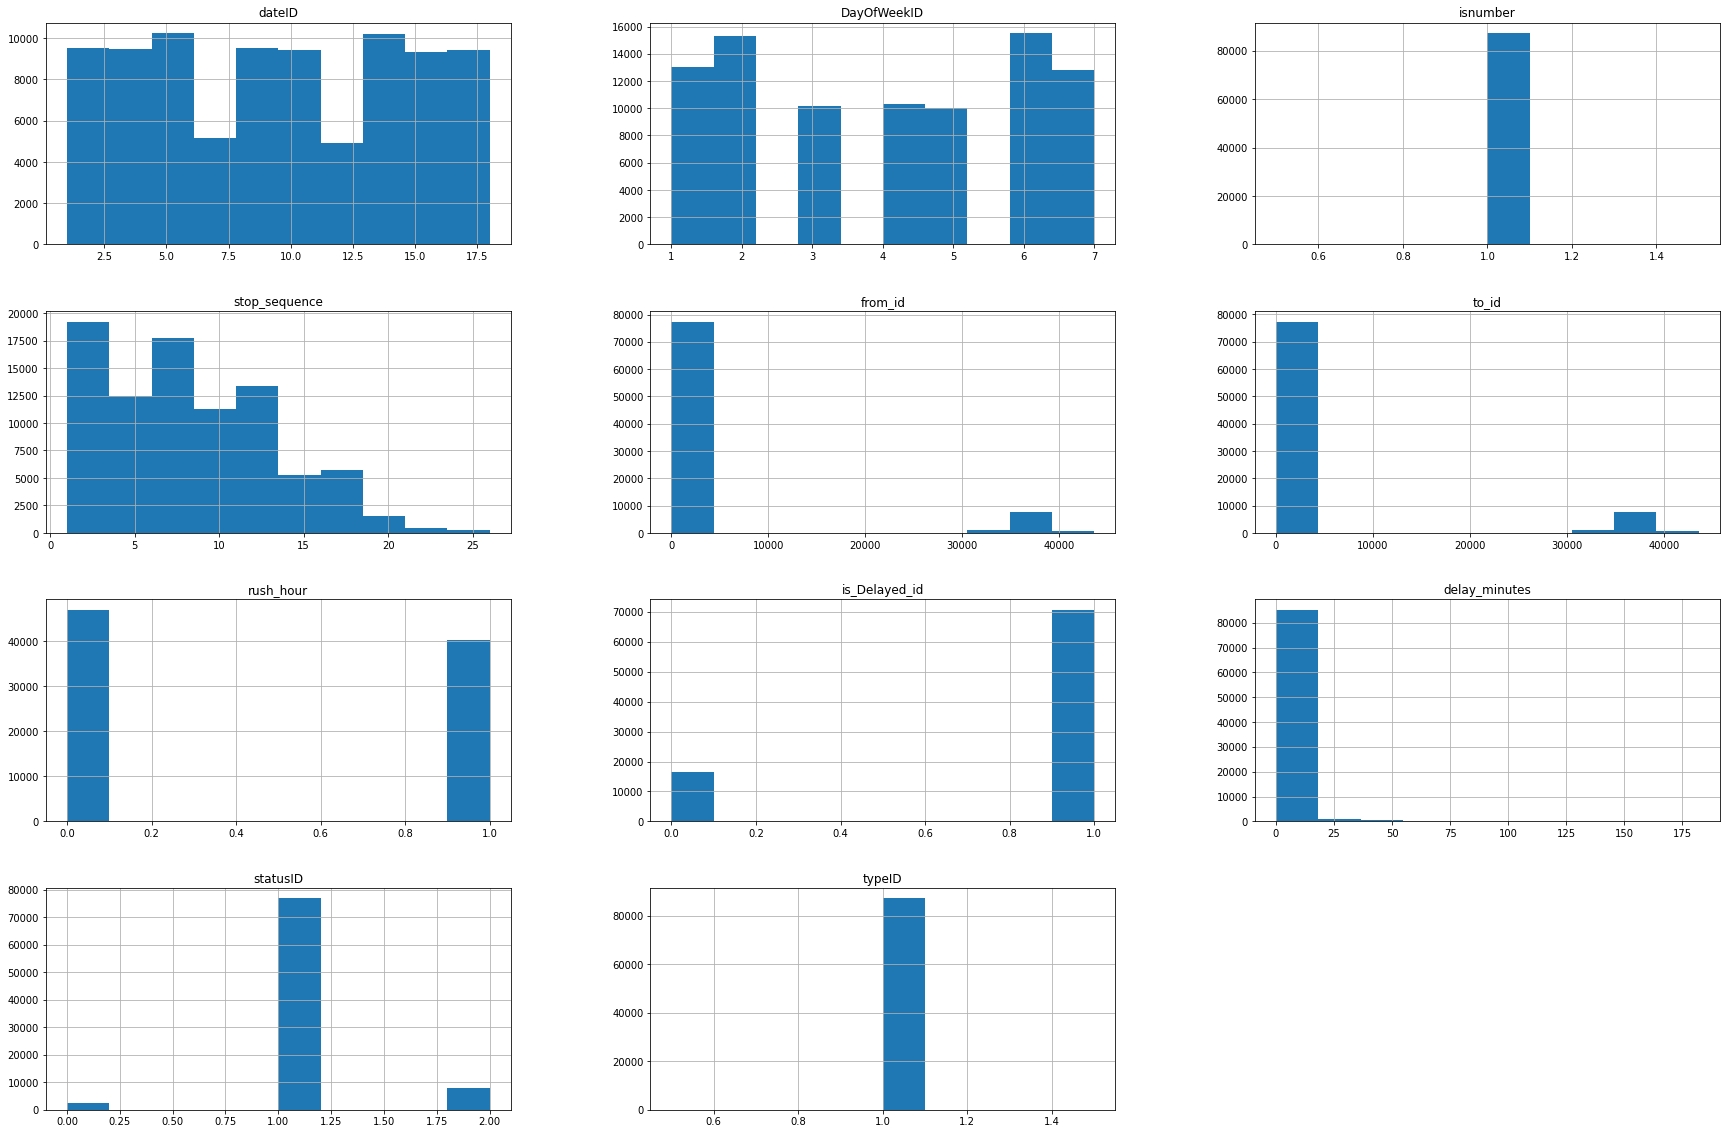

In [ ]:
df.hist(figsize=(30,20))


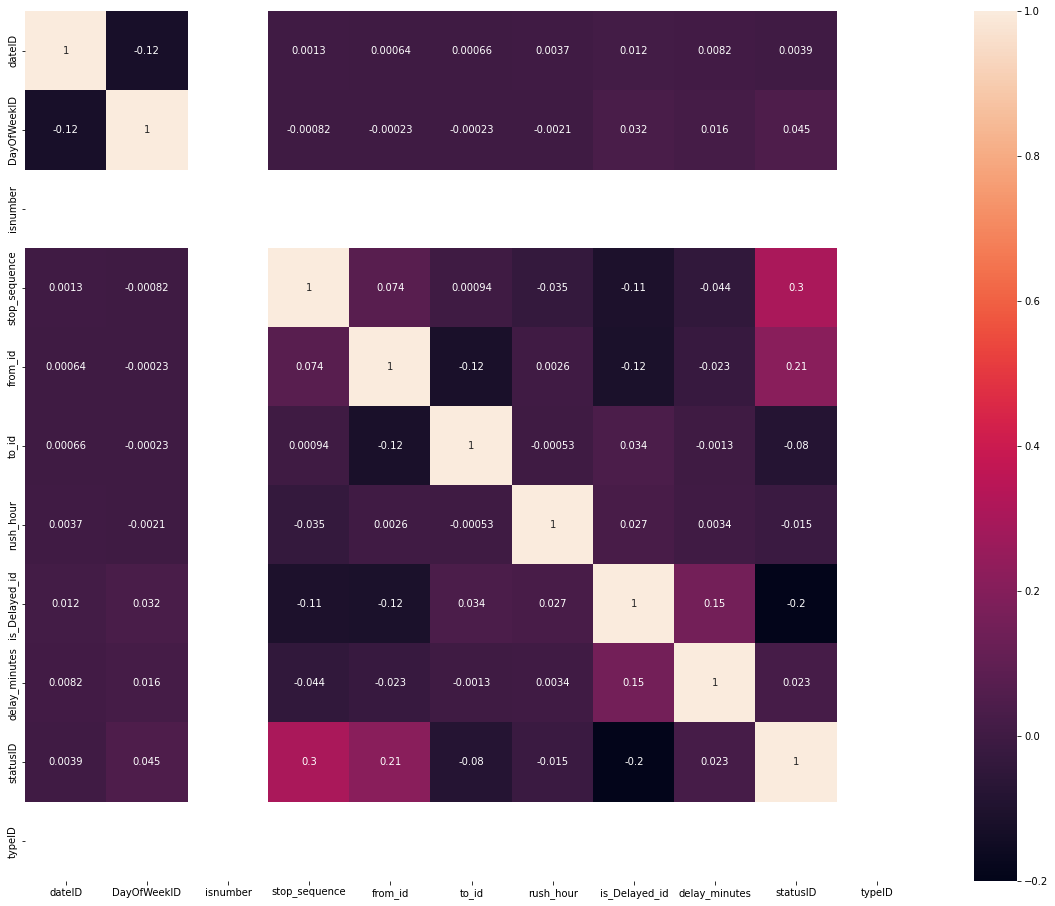


Correlation Table


,dateID,DayOfWeekID,isnumber,stop_sequence,from_id,to_id,rush_hour,is_Delayed_id,delay_minutes,statusID,typeID
dateID,1.000000,-0.121237,NaN,0.001307,0.000637,0.000656,0.003658,0.011899,0.008166,0.003863,NaN
DayOfWeekID,-0.121237,1.000000,NaN,-0.000821,-0.000233,-0.000231,-0.002059,0.032176,0.015804,0.045102,NaN
isnumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stop_sequence,0.001307,-0.000821,NaN,1.000000,0.073565,0.000941,-0.034930,-0.107307,-0.044079,0.303198,NaN
from_id,0.000637,-0.000233,NaN,0.073565,1.000000,-0.116791,0.002570,-0.116064,-0.022739,0.212960,NaN
to_id,0.000656,-0.000231,NaN,0.000941,-0.116791,1.000000,-0.000526,0.034410,-0.001278,-0.080324,NaN
rush_hour,0.003658,-0.002059,NaN,-0.034930,0.002570,-0.000526,1.000000,0.026798,0.003393,-0.015468,NaN
is_Delayed_id,0.011899,0.032176,NaN,-0.107307,-0.116064,0.034410,0.026798,1.000000,0.154971,-0.200496,NaN
delay_minutes,0.008166,0.015804,NaN,-0.044079,-0.022739,-0.001278,0.003393,0.154971,1.000000,0.022773,NaN
statusID,0.003863,0.045102,NaN,0.303198,0.212960,-0.080324,-0.015468,-0.200496,0.022773,1.000000,NaN


In [ ]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot = True)
plt.show()

print()
print("Correlation Table")
# Correlation factors for 'delay time'.
df.corr()

In [ ]:
df


,dateID,date,DayOfWeekID,DayOfWeek,isnumber,train_id,stop_sequence,from_id,from,to_id,to,rush_hour,scheduled_time,actual_time,is_Delayed_id,is_Delayed,delay_minutes,statusID,status,lineID,line,typeID,type
0,1,5/1/2020,6,Friday,True,5543,1.0,107,Newark Penn Station,107,Newark Penn Station,0,23:38,23:40,1,yes,2.150000,1,departed,1,Raritan Valley,1,NJ Transit
1,1,5/1/2020,6,Friday,True,5543,2.0,107,Newark Penn Station,38105,Union,0,23:47,23:47,1,yes,0.016667,1,departed,1,Raritan Valley,1,NJ Transit
2,1,5/1/2020,6,Friday,True,5543,3.0,38105,Union,31,Roselle Park,0,23:50,23:51,1,yes,1.066667,1,departed,1,Raritan Valley,1,NJ Transit
3,1,5/1/2020,6,Friday,True,5543,4.0,31,Roselle Park,32,Cranford,0,23:55,23:55,1,yes,0.516667,1,departed,1,Raritan Valley,1,NJ Transit
4,1,5/1/2020,6,Friday,True,5543,5.0,32,Cranford,155,Westfield,0,23:59,23:59,1,yes,0.016667,1,departed,1,Raritan Valley,1,NJ Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98693,18,5/18/2020,2,Monday,True,5529,9.0,120,Plainfield,36,Dunellen,1,17:16,17:19,1,yes,3.166667,1,departed,1,Raritan Valley,1,NJ Transit
98694,18,5/18/2020,2,Monday,True,5529,10.0,36,Dunellen,21,Bound Brook,1,17:21,17:24,1,yes,3.100000,1,departed,1,Raritan Valley,1,NJ Transit
98695,18,5/18/2020,2,Monday,True,5529,11.0,21,Bound Brook,24,Bridgewater,1,17:24,17:27,1,yes,3.183333,1,departed,1,Raritan Valley,1,NJ Transit
98696,18,5/18/2020,2,Monday,True,5529,12.0,24,Bridgewater,138,Somerville,1,17:30,17:33,1,yes,3.116667,1,departed,1,Raritan Valley,1,NJ Transit


In [ ]:
df = df.drop(['date', 'dateID', 'DayOfWeek', 'isnumber', 'train_id', 'from', 'to', 'is_Delayed', 'status', 'line', 'lineID', 'type', 'typeID', 'scheduled_time', 'actual_time'],axis=1)
df = df.drop(['from_id', 'to_id'], axis=1)
df

,DayOfWeekID,stop_sequence,rush_hour,is_Delayed_id,delay_minutes,statusID
0,6,1.0,0,1,2.150000,1
1,6,2.0,0,1,0.016667,1
2,6,3.0,0,1,1.066667,1
3,6,4.0,0,1,0.516667,1
4,6,5.0,0,1,0.016667,1
...,...,...,...,...,...,...
98693,2,9.0,1,1,3.166667,1
98694,2,10.0,1,1,3.100000,1
98695,2,11.0,1,1,3.183333,1
98696,2,12.0,1,1,3.116667,1


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['statusID', 'DayOfWeekID'])
print(one_hot_encoded_data)


       stop_sequence  rush_hour  ...  DayOfWeekID_6  DayOfWeekID_7
0                1.0          0  ...              1              0
1                2.0          0  ...              1              0
2                3.0          0  ...              1              0
3                4.0          0  ...              1              0
4                5.0          0  ...              1              0
...              ...        ...  ...            ...            ...
98693            9.0          1  ...              0              0
98694           10.0          1  ...              0              0
98695           11.0          1  ...              0              0
98696           12.0          1  ...              0              0
98697           13.0          1  ...              0              0

[87172 rows x 14 columns]


In [ ]:
one_hot_encoded_data

,stop_sequence,rush_hour,is_Delayed_id,delay_minutes,statusID_0,statusID_1,statusID_2,DayOfWeekID_1,DayOfWeekID_2,DayOfWeekID_3,DayOfWeekID_4,DayOfWeekID_5,DayOfWeekID_6,DayOfWeekID_7
0,1.0,0,1,2.150000,0,1,0,0,0,0,0,0,1,0
1,2.0,0,1,0.016667,0,1,0,0,0,0,0,0,1,0
2,3.0,0,1,1.066667,0,1,0,0,0,0,0,0,1,0
3,4.0,0,1,0.516667,0,1,0,0,0,0,0,0,1,0
4,5.0,0,1,0.016667,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98693,9.0,1,1,3.166667,0,1,0,0,1,0,0,0,0,0
98694,10.0,1,1,3.100000,0,1,0,0,1,0,0,0,0,0
98695,11.0,1,1,3.183333,0,1,0,0,1,0,0,0,0,0
98696,12.0,1,1,3.116667,0,1,0,0,1,0,0,0,0,0


### PCA Reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaledData = Scaler.transform(df)

In [ ]:
scaledData

array([[ 0.96430411, -1.41384053, -0.92679852,  0.48423763, -0.1103369 ,
        -0.18094925],
       [ 0.96430411, -1.21320776, -0.92679852,  0.48423763, -0.31840522,
        -0.18094925],
       [ 0.96430411, -1.01257499, -0.92679852,  0.48423763, -0.21599659,
        -0.18094925],
       ...,
       [-0.96174112,  0.59248718,  1.07898317,  0.48423763, -0.00955381,
        -0.18094925],
       [-0.96174112,  0.79311995,  1.07898317,  0.48423763, -0.01605594,
        -0.18094925],
       [-0.96174112,  0.99375272,  1.07898317, -2.06510181, -0.32003076,
         2.77403537]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
pca_xnew = pca.fit(scaledData)

In [ ]:
x_pca = pca.transform(scaledData)

In [ ]:
scaledData.shape

(87172, 6)

In [ ]:
x_pca.shape

(87172, 2)

In [ ]:
scaledData

array([[ 0.96430411, -1.41384053, -0.92679852,  0.48423763, -0.1103369 ,
        -0.18094925],
       [ 0.96430411, -1.21320776, -0.92679852,  0.48423763, -0.31840522,
        -0.18094925],
       [ 0.96430411, -1.01257499, -0.92679852,  0.48423763, -0.21599659,
        -0.18094925],
       ...,
       [-0.96174112,  0.59248718,  1.07898317,  0.48423763, -0.00955381,
        -0.18094925],
       [-0.96174112,  0.79311995,  1.07898317,  0.48423763, -0.01605594,
        -0.18094925],
       [-0.96174112,  0.99375272,  1.07898317, -2.06510181, -0.32003076,
         2.77403537]])

In [ ]:
x_pca

array([[-1.02767373,  0.1364221 ],
       [-0.8713142 ,  0.03528972],
       [-0.77699174,  0.15617393],
       ...,
       [-0.13482868, -0.14924562],
       [-0.01874453, -0.10624157],
       [ 3.23448788, -0.35402355]])

In [ ]:
Data = df.drop(['delay_minutes'], axis = 1)


In [ ]:
# load data into X variables
X = Data

In [ ]:
# need to standardize the features
X_std = StandardScaler().fit_transform(X)


### PCA K Means

In [ ]:
#Adjusting the PCA model to have 2 components:
pca = PCA(n_components=2)
pcadf_pca = pca.fit_transform(X_std)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=42, max_iter=5000)

# Fit model
%timeit kmeans_cluster.fit(pcadf_pca)
km_y_pred = kmeans_cluster.predict(pcadf_pca)
print()
print("The silhouette score of the k-Means solution: {}"
      .format(metrics.silhouette_score(pcadf_pca, km_y_pred, metric='euclidean')))


1 loop, best of 5: 606 ms per loop

The silhouette score of the k-Means solution: 0.46387756343534275


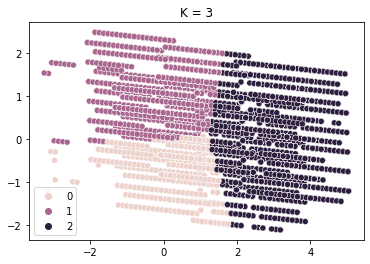

In [ ]:
# Plot the solution.
sns.scatterplot(pcadf_pca[:,0], pcadf_pca[:,1], hue = km_y_pred)
plt.title("K = 3")
plt.legend()
plt.show()

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=42, max_iter=5000)

# Fit model
%timeit kmeans_cluster.fit(pcadf_pca)
km_y_pred = kmeans_cluster.predict(pcadf_pca)
print()
print("The silhouette score of the k-Means solution: {}"
      .format(metrics.silhouette_score(pcadf_pca, km_y_pred, metric='euclidean')))


1 loop, best of 5: 918 ms per loop

The silhouette score of the k-Means solution: 0.4087628035588217


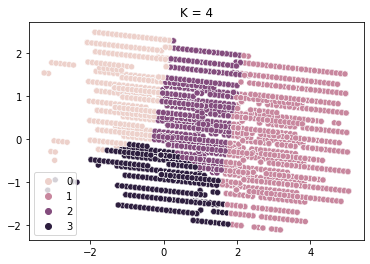

In [ ]:
sns.scatterplot(pcadf_pca[:,0], pcadf_pca[:,1], hue = km_y_pred)
plt.title("K = 4")
plt.legend()
plt.show()

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=5, random_state=42, max_iter=5000)

# Fit model
%timeit kmeans_cluster.fit(pcadf_pca)
km_y_pred = kmeans_cluster.predict(pcadf_pca)
print()
print("The silhouette score of the k-Means solution: {}"
      .format(metrics.silhouette_score(pcadf_pca, km_y_pred, metric='euclidean')))


1 loop, best of 5: 1.39 s per loop

The silhouette score of the k-Means solution: 0.3665497503997081


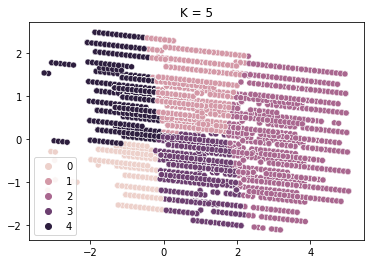

In [ ]:
sns.scatterplot(pcadf_pca[:,0], pcadf_pca[:,1], hue = km_y_pred)
plt.title("K = 5")
plt.legend()
plt.show()

## Which Cluster Contains the Most Train Delay on Friday?
## Which Cluster Contains the Most Train Delay on Weekdays during Rush Hour


In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=6, random_state=42, max_iter=5000)

# Fit model
%timeit kmeans_cluster.fit(pcadf_pca)
km_y_pred = kmeans_cluster.predict(pcadf_pca)
print()
print("The silhouette score of the k-Means solution: {}"
      .format(metrics.silhouette_score(pcadf_pca, km_y_pred, metric='euclidean')))


1 loop, best of 5: 1.49 s per loop

The silhouette score of the k-Means solution: 0.367364389654664


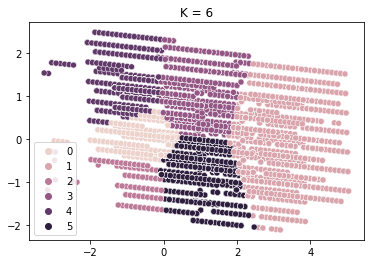

In [ ]:
# Plot the solution.
sns.scatterplot(pcadf_pca[:,0], pcadf_pca[:,1], hue = km_y_pred)
plt.title("K = 6")
plt.legend()
plt.show()

In [ ]:
df

### tSNE & GMM